# БИБЛИОТЕКИ

In [19]:
import community as community_louvain

In [20]:
import requests

In [21]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np 
import pandas as pd
%matplotlib inline 

In [22]:
from sklearn import datasets
from sklearn import decomposition

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
from apyori import apriori

In [25]:
import networkx as nx

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn import tree

# ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ

## 1. КЛАСТЕРИЗАЦИЯ МЕТОДОМ К-СРЕДНИХ

Доп. источник:
https://tonais.ru/library/klasterizatsiya-k-srednih-s-pomoschyu-scikit-learn-v-python

In [29]:
X = np.array([
    [5,3], 
    [10,15],
    [15,12], 
    [24,10], 
    [30,45], 
    [85,70], 
    [71,80], 
    [60,78], 
    [55,52], 
    [80,91],
])

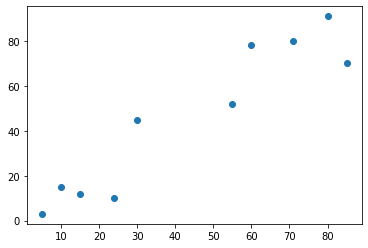

In [30]:
plt.scatter(X[:,0],X[:,1], label='True Position') 

In [31]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)

KMeans(n_clusters=2)

In [32]:
centers = kmeans.cluster_centers_
centers

array([[70.2, 74.2],
       [16.8, 17. ]])

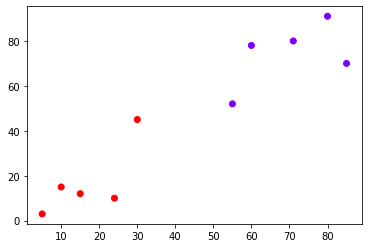

In [33]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

In [34]:
print(kmeans.labels_) 

[1 1 1 1 1 0 0 0 0 0]


## 2. МЕТОД ГЛАВНЫХ КОМПОНЕНТ

Доп. источник:
https://russianblogs.com/article/9550153773/

In [35]:
iris = datasets.load_iris()
iris_X = iris.data

In [36]:
iris_X.shape

(150, 4)

In [37]:
pca = decomposition.PCA()
pca

PCA()

In [38]:
iris_pca = pca.fit_transform(iris_X)
iris_pca[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [39]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [40]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [41]:
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape

(150, 2)

Text(0.5, 1.0, 'PCA 2 Components')

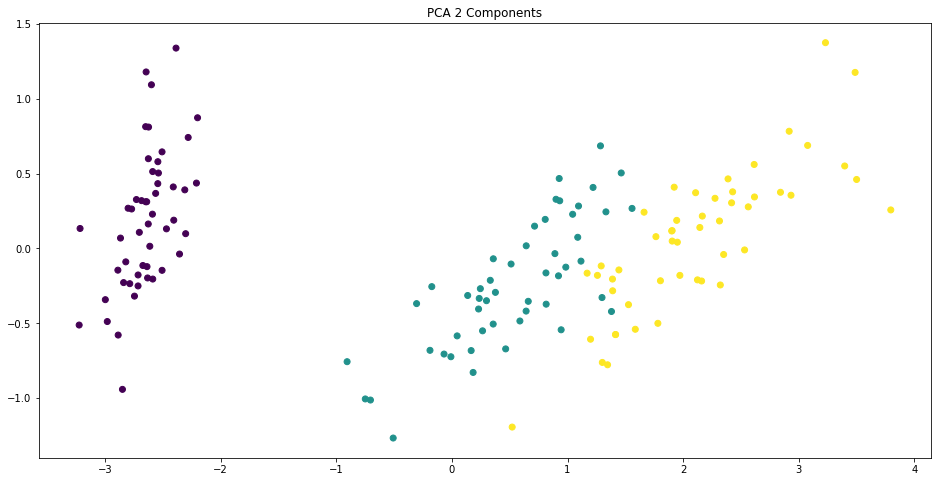

In [42]:
f = plt.figure(figsize=(16, 8))
ax = f.add_subplot(111)
ax.scatter(iris_X_prime[:,0], iris_X_prime[:, 1], c=iris.target)
ax.set_title("PCA 2 Components")

In [43]:
pca.explained_variance_ratio_.sum()

0.977685206318795

# 3. АССОЦИАТИВНЫЕ ПРАВИЛА

Доп. источник: https://habr.com/ru/company/ods/blog/353502/

In [44]:
data = [
    [0, 'beer'],
    [1, 'water'],
    [2, 'juice'],
    [3, 'beer'],
    [4, 'water'],
    [5, 'coffee']
]
columns = ['id', 'items']

In [45]:
transaction = pd.DataFrame(data=data,columns=columns ) 

In [46]:
transaction

,id,items
0,0,beer
1,1,water
2,2,juice
3,3,beer
4,4,water
5,5,coffee


In [47]:
norm_transaction = pd.get_dummies(transaction['items'])
norm_transaction

,beer,coffee,juice,water
0,1,0,0,0
1,0,0,0,1
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1
5,0,1,0,0


In [48]:
transactions = [
    ['beer', 'nuts'],
    ['beer', 'cheese'],
]
results = list(apriori(transactions,
               max_length=1,
               min_support=0.1,
               min_confidence=1      
              ))
results

[RelationRecord(items=frozenset({'beer'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beer'}), confidence=1.0, lift=1.0)])]

# 4. СОЦИАЛЬНЫЕ СЕТИ

In [49]:
edgelist = [['Mannheim', 'Frankfurt', 85], ['Mannheim', 'Karlsruhe', 80], ['Erfurt',
'Wurzburg', 186], ['Munchen', 'Numberg', 167], ['Munchen', 'Augsburg', 84], ['Munchen',
'Kassel', 502], ['Numberg', 'Stuttgart', 183], ['Numberg', 'Wurzburg', 103], ['Numberg',
'Munchen', 167], ['Stuttgart', 'Numberg', 183], ['Augsburg', 'Munchen', 84], ['Augsburg',
'Karlsruhe', 250], ['Kassel', 'Munchen', 502], ['Kassel', 'Frankfurt', 173], ['Frankfurt',
'Mannheim', 85], ['Frankfurt', 'Wurzburg', 217], ['Frankfurt', 'Kassel', 173],
['Wurzburg', 'Numberg', 103], ['Wurzburg', 'Erfurt', 186], ['Wurzburg', 'Frankfurt', 217],
['Karlsruhe', 'Mannheim', 80], ['Karlsruhe', 'Augsburg', 250],['Mumbai', 'Delhi',400],
['Delhi', 'Kolkata',500],['Kolkata', 'Bangalore',600],['TX', 'NY',1200],['ALB', 'NY',800]]

In [50]:
g = nx.Graph()
for edge in edgelist:
    g.add_edge(edge[0],edge[1], weight = edge[2])

In [51]:
for i, x in enumerate(nx.connected_components(g)):
    print('«cc»'+str(i)+':',x)

«cc»0: {'Munchen', 'Mannheim', 'Stuttgart', 'Frankfurt', 'Wurzburg', 'Numberg', 'Erfurt', 'Augsburg', 'Kassel', 'Karlsruhe'}
«cc»1: {'Mumbai', 'Kolkata', 'Bangalore', 'Delhi'}
«cc»2: {'NY', 'ALB', 'TX'}


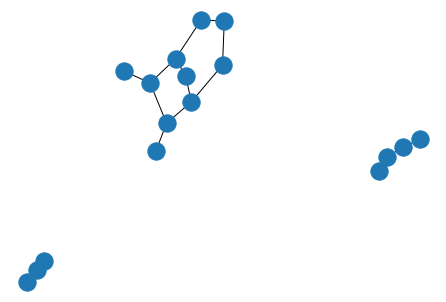

In [52]:
nx.draw(g)

In [53]:
graph = nx.Graph() #создание графа с нуля

In [54]:
graph.add_node(1)
graph.add_nodes_from([2,3])

In [55]:
graph.nodes()

NodeView((1, 2, 3))

In [56]:
graph.add_edge(1,2)
graph.add_edges_from([(1,2),(2,3)])

In [57]:
graph.edges()

EdgeView([(1, 2), (2, 3)])

In [58]:
graph.graph["day"]="Monday"
graph.graph # Атрибуты графа

{'day': 'Monday'}

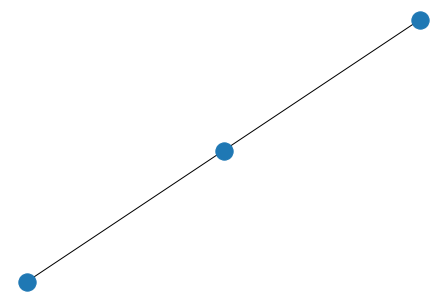

In [59]:
nx.draw(graph)
# nx.draw_random(graph)
# nx.draw_circular(graph)
# nx.draw_spectral(graph)
plt.show()

**Лувенский метод**

In [60]:
# define the graph
edge = [(1,2),(1,3),(1,4),(1,5),(1,6),(2,7),(2,8),(2,9)]
G = nx.Graph()
G.add_edges_from(edge)
G.edges

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 7), (2, 8), (2, 9)])

In [61]:
# return partition as a dict
partition = community_louvain.best_partition(G)

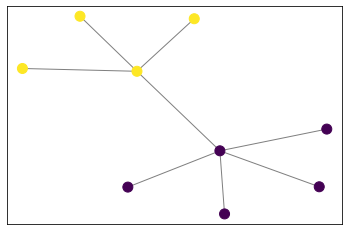

In [62]:
# visualization
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# ОБУЧЕНИЕ С УЧИТЕЛЕМ

# 1. РЕГРЕССИОННЫЙ АНАЛИЗ


**Регрессия**

In [63]:
x = np.array([5, 15, 25, 35, 45, 55, 65, 75]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38, 44, 50])

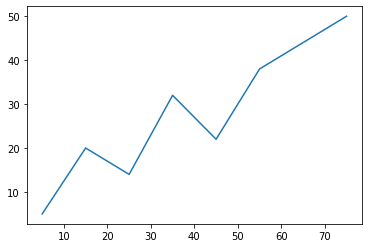

In [64]:
plt.plot(x,y)

In [65]:
model = LinearRegression()

In [66]:
model.fit(x, y)

LinearRegression()

In [67]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.874718028804442


In [68]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 7.41666667 13.33333333 19.25       25.16666667 31.08333333 37.
 42.91666667 48.83333333]


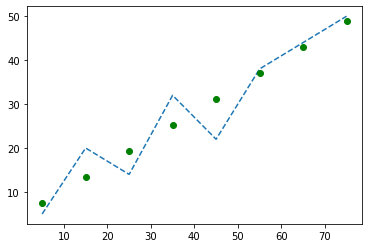

In [70]:
plt.plot(x,y, ls='--')
plt.plot(x, y_pred, 'go')

# 2. МЕТОД К-БЛИЖАЙШИХ СОСЕДЕЙ И ОБНАРУЖЕНИЕ АНОМАЛИЙ 

Доп. источник: https://pythobyte.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn-31cdde4d/
https://www.machinelearningmastery.ru/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02/ про скаляры

In [71]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
X = dataset.iloc[:, :-1].values # разбить наш набор данных на его атрибуты и метки.
y = dataset.iloc[:, 4].values

In [74]:
# Чтобы избежать переобучения, мы разделим наш набор данных на обучающие 
# и тестовые разбиения, что даст нам лучшее представление о том, как работает наш алгоритм на этапе тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# разбивает набор данных на 80% обучающих данных и 20% тестовых данных

In [75]:
# Поскольку алгоритм K-ближайших соседей делает прогнозы относительно точки данных (семпла), 
# используя наиболее близкие к ней наблюдения, существующий масштаб показателей в датасете имеет 
# большое значение. Из-за этого специалисты по машинному обучению обычно стандартизируют набор данных, 
# что означает корректировку каждого значения x так, чтобы они находились примерно в одном диапазоне.
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [77]:
y_pred = classifier.predict(X_test) # прогнозы по нашим тестовым данным

**Для оценки алгоритма наиболее часто используются матрица путаницы, точность, отзыв и оценка f1**

In [78]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [79]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

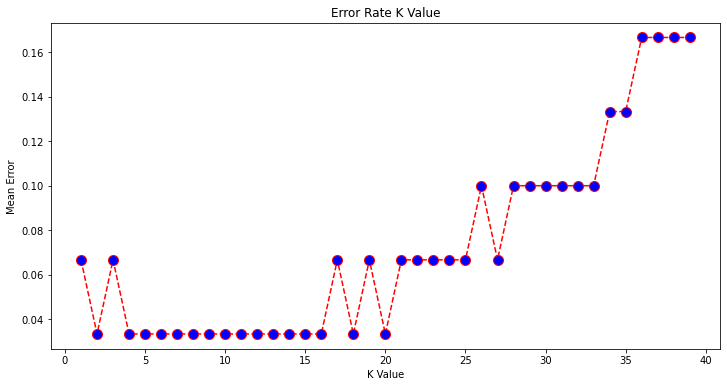

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# 3. МЕТОД ОПОРНЫХ ВЕКТОРОВ 


In [81]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
X = dataset.iloc[:, :-1].values # разбить наш набор данных на его атрибуты и метки.
y = dataset.iloc[:, 4].values

In [83]:
# Чтобы избежать переобучения, мы разделим наш набор данных на обучающие 
# и тестовые разбиения, что даст нам лучшее представление о том, как работает наш алгоритм на этапе тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# разбивает набор данных на 80% обучающих данных и 20% тестовых данных

In [84]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
svclassifier = SVC(kernel='linear')
svclassifier = SVC(kernel='poly', degree=3)
svclassifier.fit(X_train, y_train)

SVC(kernel='poly')

In [86]:
y_pred = svclassifier.predict(X_test) # прогнозы по нашим тестовым данным

In [87]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [88]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    svclassifier = SVC(kernel='poly', degree=i)
    svclassifier.fit(X_train, y_train)
    pred_i = svclassifier.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

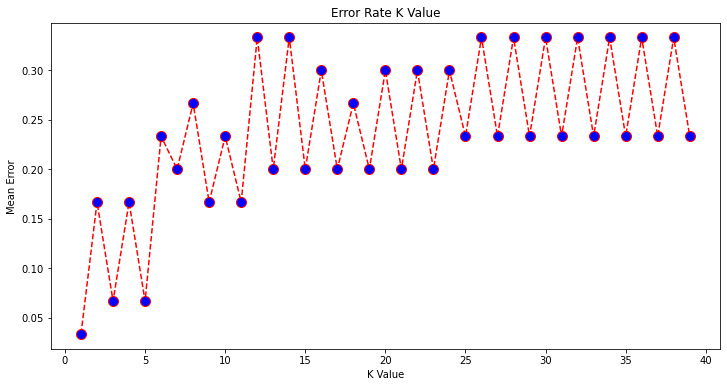

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# 4. ДЕРЕВО РЕШЕНИЙ


Основная сфера применения деревьев решений — поддержка процессов принятия управленческих решений, используемая в статистике, анализе данных и машинном обучении. Задачами, решаемыми с помощью данного аппарата, являются:

Классификация — отнесение объектов к одному из заранее известных классов. Целевая переменная должна иметь дискретные значения.
Регрессия (численное предсказание) — предсказание числового значения независимой переменной для заданного входного вектора.
Описание объектов — набор правил в дереве решений позволяет компактно описывать объекты. Поэтому вместо сложных структур, описывающих объекты, можно хранить деревья решений.


Доп. источник: https://habr.com/ru/company/skillfactory/blog/526970/

**Для категориальных**

In [96]:
names = ['attr1', 'attr2', 'attr3', 'attr4', 'Class']

In [97]:
dataset = pd.read_csv('/Users/nikitagudilin/Desktop/Стажировка/Education/data_banknote_authentication.txt'
                     , names=names)

In [98]:
dataset.head()

,attr1,attr2,attr3,attr4,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [99]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [101]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, 
                              random_state=1)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [102]:
y_pred = classifier.predict(X_test)

In [103]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[143   5]
 [  6 121]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       148
           1       0.96      0.95      0.96       127

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



[Text(502.20000000000005, 489.24, 'X[0] <= 0.32\ngini = 0.493\nsamples = 1097\nvalue = [614, 483]'),
 Text(296.75454545454545, 380.52000000000004, 'X[1] <= 6.838\ngini = 0.308\nsamples = 525\nvalue = [100, 425]'),
 Text(182.61818181818182, 271.8, 'X[0] <= -0.459\ngini = 0.121\nsamples = 431\nvalue = [28, 403]'),
 Text(91.30909090909091, 163.08000000000004, 'X[2] <= 6.219\ngini = 0.069\nsamples = 362\nvalue = [13, 349]'),
 Text(45.654545454545456, 54.360000000000014, 'gini = 0.0\nsamples = 241\nvalue = [0, 241]'),
 Text(136.96363636363637, 54.360000000000014, 'gini = 0.192\nsamples = 121\nvalue = [13, 108]'),
 Text(273.92727272727274, 163.08000000000004, 'X[2] <= 4.841\ngini = 0.34\nsamples = 69\nvalue = [15, 54]'),
 Text(228.27272727272728, 54.360000000000014, 'gini = 0.18\nsamples = 60\nvalue = [6, 54]'),
 Text(319.5818181818182, 54.360000000000014, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(410.8909090909091, 271.8, 'X[0] <= -4.382\ngini = 0.359\nsamples = 94\nvalue = [72, 22]

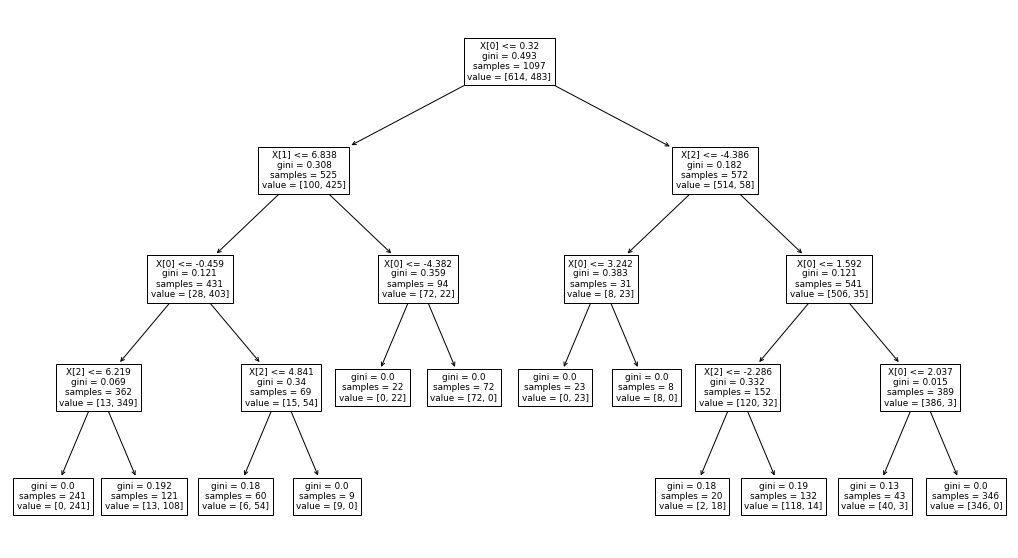

In [104]:
plt.figure(figsize=(18,10)) 
tree.plot_tree(classifier)

# 5. СЛУЧАЙНЫЕ ЛЕСА

In [105]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
dataset.shape

(150, 5)

In [107]:
X = dataset.iloc[:, :-1].values # разбить наш набор данных на его атрибуты и метки.
y = dataset.iloc[:, 4].values

In [108]:
# Чтобы избежать переобучения, мы разделим наш набор данных на обучающие 
# и тестовые разбиения, что даст нам лучшее представление о том, как работает наш алгоритм на этапе тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
# разбивает набор данных на 80% обучающих данных и 20% тестовых данных

In [109]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [121]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 16  1]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [116]:
error = []

# Calculating error for K values between 100 and 1000
for i in range(100, 1000, 100):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    pred_i = clf.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

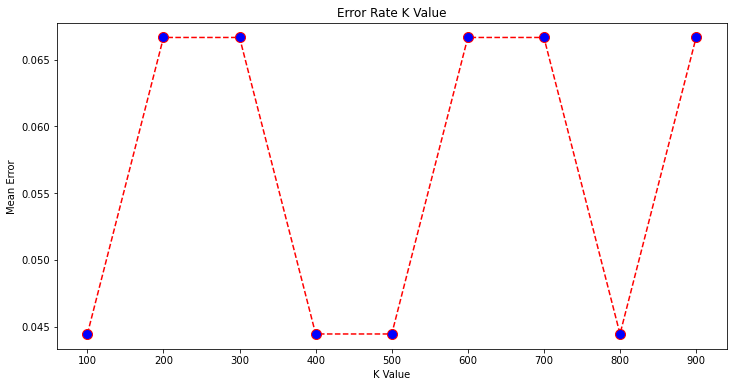

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(range(100, 1000, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# 6. НЕЙРОННЫЕ СЕТИ

Доп. источник: https://python-scripts.com/intro-to-neural-networks

**Простой нейрон**

In [125]:
def sigmoid(x):
    # Наша функция активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

In [126]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
 
    def feedforward(self, inputs):
        # Вводные данные о весе, добавление смещения 
        # и последующее использование функции активации
 
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

In [127]:
weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4  # b = 4
n = Neuron(weights, bias)
 
x = np.array([2, 3])  # x1 = 2, x2 = 3
print(n.feedforward(x))  # 0.9990889488055994

0.9990889488055994


# ОБУЧЕНИЕ С ПОДКРЕПЛЕНИЕМ

# 1. A/B-тестирование и многорукие бандиты

In [129]:
money = 2000

In [133]:
bandit = pd.Series({'hand1':0.5, 'hand2':0.4})

In [137]:
def a_b(money, bandit):
    revenue1 = (money/2) * bandit['hand1']
    revenue2 = (money/2) * bandit['hand2']
    return revenue1 + revenue2 

In [139]:
full_exploration = a_b(money, bandit)
full_exploitation = money * bandit['hand1'] # если есть инсайдерская информация
print(full_exploration)
print(full_exploitation)

900.0
1000.0


In [140]:
eps_decreasing = 984